# Chapter 1. The Machine Learning Landscape

## What is Machine Learning?

Machine Learning is the science of programming computers so they can learn from data.

A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. -- Tom Mitchell, 1997.

Example: spam filter
Task T: to flag spam for new emails
Experience E: existing emails with labels (either spam or non-spam)
Performance measure P: ratio of correctly classified emails

Non-example: the collection of Wikipedia pages

## Why Use Machine Learning?

Traditional approach for spam filter:
1. Choose features of spam emails manually: "4U", "credit card", "free", "amazing"
2. Write an program to detect exactly the features you chose
3. Test the program and modify the features until satisfactory

Drawbacks: 
1. A large amount of features are needed - hard to maintain
2. Spammers may change their writing to avoid explicit rules: change "4U" to "For U".
3. For some complex problems, manually-engineered features are not good enough: hand-written digits

Machine Learning models:
1. Automatically learns which words and phrases are good predictors of spam. 
2. Since the program is not a stack of explicit rules, it is much shorter, easier to maintain, and most likely more accurate.
3. With new training data, the Machine Learning model can update automatically to capture new indicators of spam emails.

What Machine Learning is great for:
1. Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
2. Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
3. Fluctuating environments: a Machine Learning system can adapt to new data.
4. Large amount of data: With Machine Learning, computers process big data faster than human.



## Task 1: Does money make people happier?
Suppose you want to know if money makes people happy, so you download the Better Life Index data from the OECD's website:

http://stats.oecd.org/index.aspx?DataSetCode=BLI

as well as stats about GDP per capita from the IMF's website:

http://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512%2C668%2C914%2C672%2C612%2C946%2C614%2C137%2C311%2C962%2C213%2C674%2C911%2C676%2C193%2C548%2C122%2C556%2C912%2C678%2C313%2C181%2C419%2C867%2C513%2C682%2C316%2C684%2C913%2C273%2C124%2C868%2C339%2C921%2C638%2C948%2C514%2C943%2C218%2C686%2C963%2C688%2C616%2C518%2C223%2C728%2C516%2C558%2C918%2C138%2C748%2C196%2C618%2C278%2C624%2C692%2C522%2C694%2C622%2C142%2C156%2C449%2C626%2C564%2C628%2C565%2C228%2C283%2C924%2C853%2C233%2C288%2C632%2C293%2C636%2C566%2C634%2C964%2C238%2C182%2C662%2C453%2C960%2C968%2C423%2C922%2C935%2C714%2C128%2C862%2C611%2C135%2C321%2C716%2C243%2C456%2C248%2C722%2C469%2C942%2C253%2C718%2C642%2C724%2C643%2C576%2C939%2C936%2C644%2C961%2C819%2C813%2C172%2C199%2C132%2C733%2C646%2C184%2C648%2C524%2C915%2C361%2C134%2C362%2C652%2C364%2C174%2C732%2C328%2C366%2C258%2C734%2C656%2C144%2C654%2C146%2C336%2C463%2C263%2C528%2C268%2C923%2C532%2C738%2C944%2C578%2C176%2C537%2C534%2C742%2C536%2C866%2C429%2C369%2C433%2C744%2C178%2C186%2C436%2C925%2C136%2C869%2C343%2C746%2C158%2C926%2C439%2C466%2C916%2C112%2C664%2C111%2C826%2C298%2C542%2C927%2C967%2C846%2C443%2C299%2C917%2C582%2C544%2C474%2C941%2C754%2C446%2C698%2C666&s=NGDPDPC&grp=0&a=

Download these data as BLI.csv and gdp_per_capita.aspx

### TODO: extract country name, Better Life Index, and GDP per capita from files.

In [136]:
# change current directory to the folder with data files.# set up current directory
import os
datapath = os.getcwd()
datapath = os.path.join(datapath, '')
os.chdir(datapath)
os.getcwd()

'C:\\Users\\Amanda\\Downloads\\CMP 464'

In [150]:
# load the data
# pandas.read_csv() reads csv (comma-separated value) files into DataFrame.

import pandas as pd
oecd_bli = pd.read_csv(datapath + 'BLI.csv', thousands=',', delimiter='\t')
gdp_per_capita = pd.read_csv(datapath + "GDP per capita.aspx",
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1', 
                             na_values="n/a")

### DataFrame
Data frame is a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. A data frame's row may contain different types of values: numeric, character, logical, etc.

Data frames in Python come with the Pandas libarary, and they are defined as a two-dimensional labeled data structures with columns of potentially different types.

Toturials of Pandas can be found here:

https://pandas.pydata.org/pandas-docs/stable/10min.html

https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

In [151]:
oecd_bli.columns
df2 = gdp_per_capita
gdp_per_capita.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

In [152]:
# create a copy of the first data frame and rename it as df for simplicity
df = oecd_bli

In [39]:
# display the first few rows
df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN


In [40]:
# display the first 15 rows
df.head(15)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.0,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.0,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,17.4,NaN,NaN


In [41]:
# display the bottom 15 rows
df.tail(15)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
3383,ESP,Spain,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,15.48,NaN,NaN
3384,SWE,Sweden,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,15.23,NaN,NaN
3385,CHE,Switzerland,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,14.78,E,Estimated value
3386,TUR,Turkey,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,12.22,E,Estimated value
3387,GBR,United Kingdom,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,14.86,NaN,NaN
3388,USA,United States,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,14.39,NaN,NaN
3389,BRA,Brazil,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,14.18,E,Estimated value
3390,CHL,Chile,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,14.66,E,Estimated value
3391,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,14.43,NaN,NaN
3392,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,NaN,NaN,13.63,E,Estimated value


In [42]:
# display the inex
df.index

RangeIndex(start=0, stop=3398, step=1)

In [153]:
# display column names
df.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [154]:
# display data types of each column
df['Value'].dtypes
df.dtypes

LOCATION                  object
Country                   object
INDICATOR                 object
Indicator                 object
MEASURE                   object
Measure                   object
INEQUALITY                object
Inequality                object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes                object
Flags                     object
dtype: object

In [45]:
# display statistics of each numeric column
df.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,3398.0,0.0,0.0,3398.000000
mean,0.0,NaN,NaN,5353.200309
std,0.0,NaN,NaN,15832.099269
min,0.0,NaN,NaN,0.000000
25%,0.0,NaN,NaN,7.000000
50%,0.0,NaN,NaN,62.000000
75%,0.0,NaN,NaN,91.000000
max,0.0,NaN,NaN,176076.000000


In [98]:
# compute the descriptive statistics: mean, median, variance, standard deviation
print(df.mean())

print(df.median())

print(df.var())

print(df.std())

PowerCode Code              0.000000
Reference Period Code            NaN
Reference Period                 NaN
Value                    5353.200309
dtype: float64
PowerCode Code            0.0
Reference Period Code     NaN
Reference Period          NaN
Value                    62.0
dtype: float64
PowerCode Code           0.000000e+00
Reference Period Code             NaN
Reference Period                  NaN
Value                    2.506554e+08
dtype: float64
PowerCode Code               0.000000
Reference Period Code             NaN
Reference Period                  NaN
Value                    15832.099269
dtype: float64


In [46]:
# display frequencies of the Indicator column
df['Indicator'].value_counts() #frequency of labels in this column

Long-term unemployment rate                          195
Student skills                                       195
Personal earnings                                    195
Employment rate                                      195
Voter turnout                                        195
Self-reported health                                 195
Household net adjusted disposable income             193
Life satisfaction                                    188
Quality of support network                           182
Years in education                                   117
Feeling safe walking alone at night                  117
Employees working very long hours                    117
Homicide rate                                        117
Time devoted to leisure and personal care            117
Water quality                                        117
Educational attainment                               117
Life expectancy                                      117
Air pollution                  

In [164]:
# Extract total Life satisfaction values and save them to a new data frame
bli = df[df['Indicator'] == 'Life satisfaction']
bli.head()
bli.shape #how many rows and columns
#bli.size how many values

inequ = bli[bli['INEQUALITY'] == 'TOT']
inequ.shape

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2859,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2860,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
2861,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
2862,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2863,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.6,NaN,NaN


In [48]:
# print shape and size of bli
print(bli.shape)
print(bli.size)

# print the countries of bli
print(bli['Country'])

(39, 17)
663
2859          Australia
2860            Austria
2861            Belgium
2862             Canada
2863     Czech Republic
2864            Denmark
2865            Finland
2866             France
2867            Germany
2868             Greece
2869            Hungary
2870            Iceland
2871            Ireland
2872              Italy
2873              Japan
2874              Korea
2875         Luxembourg
2876             Mexico
2877        Netherlands
2878        New Zealand
2879             Norway
2880             Poland
2881           Portugal
2882    Slovak Republic
2883              Spain
2884             Sweden
2885        Switzerland
2886             Turkey
2887     United Kingdom
2888      United States
2889             Brazil
2890              Chile
2891            Estonia
2892             Israel
2893             Latvia
2894             Russia
2895           Slovenia
2896       South Africa
2897       OECD - Total
Name: Country, dtype: object


(array([  1.,   3.,   2.,   1.,   7.,   2.,   4.,   5.,   4.,  10.]),
 array([ 4.8 ,  5.07,  5.34,  5.61,  5.88,  6.15,  6.42,  6.69,  6.96,
         7.23,  7.5 ]),
 <a list of 10 Patch objects>)

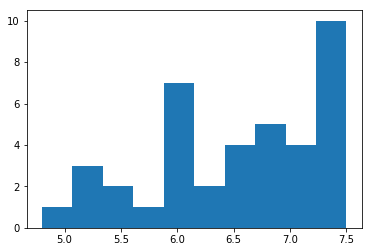

In [167]:
# plot the distribution of BLI values
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(inequ['Value'])

In [99]:
# compute descriptive statistics of df2: mean, median, variance, standard deviation
print(df2.mean())

print(df2.median())

print(df2.var())

print(df2.std())

GDP per capita           12591.099604
Estimates Start After     1969.250000
dtype: float64
GDP per capita           5373.633
Estimates Start After    2013.000
dtype: float64
GDP per capita           3.022850e+08
Estimates Start After    8.476705e+04
dtype: float64
GDP per capita           17386.345358
Estimates Start After      291.147823
dtype: float64


In [168]:
# sort countries by BLI values, then display 10 countries with greatest values.
 

In [170]:
# sort by index
df2.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

C:\Users\Amanda\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Amanda\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


2015                     12591.099604
Estimates Start After     1969.250000
dtype: float64
2015                     5373.633
Estimates Start After    2013.000
dtype: float64
2015                     3.022850e+08
Estimates Start After    8.476705e+04
dtype: float64
2015                     17386.345358
Estimates Start After      291.147823
dtype: float64


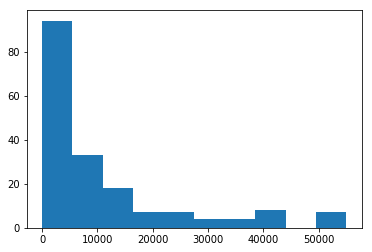

In [171]:
# explore the GDP per capita data
#1. distribution
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df2['2015'], range=(0,55000))

#2. descriptive statistics
print(df2.mean())

print(df2.median())

print(df2.var())

print(df2.std())

In [142]:
# Prepare the data
# df
# 1. extract rows whose INEQUALITY is TOT
df = df[df['INEQUALITY'] == 'TOT']

# 2. use DataFrame.pivot() to produce a pivot table of values based on the Indicator column
df = df.pivot(index='Country', columns='Indicator', values='Value')

# gdp_per_capita
# 1. use DataFrame.rename to rename gdp_per_capita's column 2015 with 'GDP per capita'
df2.rename(columns={'2015':'GDP per capita'}, inplace=True)

# 2: use DataFrame.set_index to set column 'Country' as index
df2.set_index('Country', inplace=True)

# merge two data frames as full_country_stats
full_country_stats = pd.merge(left=df, right=gdp_per_capita, 
                              left_index=True, right_index=True)

# sort the new data frame by GDP per capita
full_country_stats.sort_values(by='GDP per capita', inplace=True)

# remove row 0, 1, 6, 8, 33 - 35 and name the data frame as country_stats
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

country_stats = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]


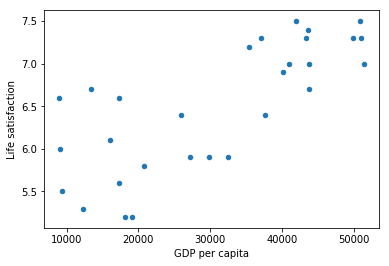

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
# visualize the data
# plot a scatter plot with x axis being 'GDP per capita' and y-axis 'Life satisfaction'
country_stats.plot(kind='scatter', x = 'GDP per capita', y = 'Life satisfaction')


### Install Sci-kit Learn library

In [86]:
import numpy as np
import sklearn.linear_model
# save GDP per capita as a numpy array X
X = np.c_[country_stats['GDP per capita']]


# save Life satisfaction as a numpy array Y

Y = np.c_[country_stats['Life satisfaction']]



# Use linear regression to fit the data
lm = sklearn.linear_model.LinearRegression()
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lm.predict(X_new))

[[ 6.18443854]]
